
# WeRateDogs Project- Wrangling & Analyzing Twitter Data

## Introduction

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. For a successful project, I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

In [121]:
#import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import json
import re
import requests
import tweepy
import csv
import sys
import os
import tweepy
from tweepy import OAuthHandler
import time
from IPython.display import Image
% matplotlib inline

## Gather Data

#### 1. Manually downloaded csv file
#### 2. Programmatically downloaded tsv file and image data using the Twitter API.

In [3]:
# Read the manually downloaded twitter file
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Download the dog image prediction files amd save the file as 'image_predictions/image-predictions.tsv'

In [4]:
# Programmatically download from the link below.
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
# Read tsv file using Pandas

images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

#### Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt

In [6]:
# Fill in details from your Twitter Developer account.

consumer_key = '#'
consumer_secret = '#'
access_token = '#'
access_secret = '#'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)

In [7]:
#Twitter Query using tweey API and tweet_id information from the dataframe.

tweet_ids = list(df.tweet_id)
exceptions = []

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True,
                                      tweet_mode='extended')
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        #print("Error for: " + str(tweet))
        exceptions.append(tweet)

Rate limit reached. Sleeping for: 711
Rate limit reached. Sleeping for: 694


In [8]:
#Print out the entries where API failed to fetch.
exceptions

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 754011816964026368]

In [9]:
# Open a file and save the data

with open('tweet_json.txt', 'w',encoding="utf-8") as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [10]:
# Read the file using Pandas

tweet_df = pd.read_json('tweet_json.txt',orient='index')

##  Assess the Data

Assessing data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# visually inspect the df dataframe
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
df.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Toby           7
Bailey         7
Daisy          7
Buddy          7
Dave           6
Koda           6
Leo            6
Bella          6
Rusty          6
Jack           6
Scout          6
Jax            6
Stanley        6
Milo           6
Oscar          6
very           5
            ... 
Dobby          1
Gerbald        1
Major          1
Julius         1
Hanz           1
Bowie          1
Sephie         1
Dido           1
Buckley        1
Rover          1
Duddles        1
Scruffers      1
Bonaparte      1
Coopson        1
Swagger        1
Shiloh         1
Ole            1
space          1
Zeek           1
Raphael        1
Tuco           1
Amélie         1
Dante          1
O              1
Mookie         1
Wiggles        1
Ferg           1
Timofy        

In [14]:
# visually inspect the images dataframe
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# visually tweet the tweet dataframe
tweet_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2558,0,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,NaN,NaN,NaN,NaN,512,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,This is a western brown Mitsubishi terrier. Up...,NaN,...,NaN,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,Here is a very happy pup. Big fan of well-main...,NaN,...,NaN,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,298,0,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,NaN,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,NaN,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:05:58.794694657,NaN,NaN,2015-11-16 00:30:50,"[0, 140]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/fv...,133,0,This is a truly beautiful English Wilson Staff...,NaN,...,NaN,NaN,NaN,NaN,58,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 22:24:13.826850816,NaN,NaN,2015-11-16 00:35:11,"[0, 138]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/v5...,1211,0,This is an odd dog. Hard on the outside but lo...,NaN,...,NaN,NaN,NaN,NaN,845,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:25:25.042405380,NaN,NaN,2015-11-16 00:49:46,"[0, 140]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/rd...,432,0,Here is a Siberian heavily armored polar bear ...,NaN,...,NaN,NaN,NaN,NaN,249,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 23:51:30.499244032,NaN,NaN,2015-11-16 00:55:59,"[0, 124]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/yW...,296,0,My oh my. This is a rare blond Canadian terrie...,NaN,...,NaN,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-09 00:16:40.524156928,NaN,NaN,2015-11-16 01:01:59,"[0, 135]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/pY...,111,0,Here is the Rand Paul of retrievers folks! He'...,NaN,...,NaN,NaN,NaN,NaN,57,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."


In [17]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
full_text                        2342 non-null object
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              

In [18]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [19]:
images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [20]:
tweet_df.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

### Key Points

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

Cleaning includes merging individual pieces of data according to the rules of tidy data.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### My Notes

##### Quality:


There are 'Retweets' included in the dataset

There are 'Replies'  included in the dataset

Incorrect Datatypes for columns like Tweet_id,retweeted_status,in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo columns

Name columns has invalid 'names'

'Null' values in name,doggo,floofer,pupper and puppo columns

Missing values in doggo,floofer,pupper and puppo columns

'Text' column has http link

Values in rating_numerator and rating_denominator are incorrect.

'timestamp' column is defined as string. 


##### Tidiness:

Multiple columns containing the same type of data, e.g. doggo, floofer, pupper and puppo all contain dog types

Multiple columns containing the same type of data, e.g. p1, p2, p3 all contain dog breed predictions

Images dataset is different from the other datasets. 

##### All Tables:
Perform an join between all three datasets. Depending on personal choice. Either left or inner join. 

Save the newly combined and cleaned data file as 'twitter_archive_master.csv' 

Any additional files stored as needed (e.g. files for additional pieces of gathered data or a database file for your stored clean data)


In [122]:
# Copy the dataframes

df_clean = df.copy()
tweet_df_clean = tweet_df.copy()
images_clean = images.copy()

## Clean the data

#### df_clean dataframe.

Identify Missing Data

Missing values for doggo, floofer, pupper and puppo columns

Missing/invalid values identified from text column

Missing info in expanded_urls. Not sure if we need this data for this investigation. 

'None' vales are present in doggo, floofer, pupper, and puppo columns


In [123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Define

Replace Missing/faulty names 

##### Code

In [124]:
# Replace Missing/faulty names with None

df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("O","O'Malley", inplace=True)
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("quite","None", inplace=True)
df_clean['name'].replace("such","None", inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True)

##### Define:

Convert timestamp to datetime object

##### Code:

In [125]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

##### Test

In [126]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

##### Define:

Remove Retweets 

##### Code:

In [127]:
# removing retweets

df_clean = df_clean[pd.isnull(df_clean['retweeted_status_id'])]
df_clean.shape[0]

2175

In [128]:
# drop columns that are not needed for investigation

df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

##### Test

In [129]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

##### Define:

Condense Dog Type columns into one column

Fix missing values

##### Code:

In [130]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [131]:
dog_types = ['doggo', 'floofer', 'pupper', 'puppo']
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [132]:
# Function to sort dog_type values into a list

def sort_dog_type(df, dog_type):
    
    list_dog = []
    
    for row in df_clean['text']:
        if dog_type in row:
            list_dog.append(dog_type)
        else:
            list_dog.append(np.NaN)
            
    return list_dog

In [133]:
# for loop to iterate
for dog_type in dog_types:
    df_clean[dog_type] = sort_dog_type(df_clean, dog_type)

##### Test

In [134]:
df_clean[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 4 columns):
doggo      88 non-null object
floofer    4 non-null object
pupper     250 non-null object
puppo      32 non-null object
dtypes: object(4)
memory usage: 85.0+ KB


In [135]:
# Counts dog_type values from text column 

for dog_type in dog_types:
    print(dog_type, df_clean.text.str.contains(dog_type).sum())

doggo 88
floofer 4
pupper 250
puppo 32


##### Define

Combine all data for puppo, pupper, floofer, doggo into a column called dog_type.
###### Code

In [136]:
df_clean['dog_type'] = df_clean.puppo.fillna(df_clean.pupper.fillna(df_clean.floofer.fillna(df_clean.doggo)))

##### Test

In [137]:
df_clean.dog_type.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_type, dtype: object

In [138]:
df_clean.dog_type.value_counts()

pupper     250
doggo       78
puppo       32
floofer      4
Name: dog_type, dtype: int64

In [139]:
# Checking the dataframe. Alternate between there two lines of code based on requirement.
#df_clean.head(30)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    88 non-null object
floofer                  4 non-null object
pupper                   250 non-null object
puppo                    32 non-null object
dog_type                 364 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 271.9+ KB


##### Define

Remove links and apply it to text column

##### Code


In [140]:
#Function to remove links and apply it to text column

def format_text_link(arg):
        http_pos = arg.find("http")
        
        # Retain row if 'http' not found
        
        if http_pos == -1:
            arg = arg
        else:
            # Remove space before link to end
            arg = arg[:http_pos - 1]
        return arg

In [141]:
df_clean.text = df_clean.text.apply(format_text_link)

##### Test

In [142]:
# Print first five rows from text column

for row in df_clean.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


##### Define

Correct the rating_numerator and rating_denominator values.

##### Code

In [143]:
# function to update the numerator value from the text column
def fix_numerator(val):
    
    num = val.rfind("/")
  
    try:
        if val[num - 2] == ".":
            numerator = val[num - 4:num].strip()
            if numerator[0] == ".":
                numerator = numerator.strip("...").strip("..")
        else:
            numerator = val[num - 2:num].strip().strip("(")
        
        return float(numerator)
    
    # catch exceptions
    
    except ValueError:
        return np.NaN

In [144]:
df_clean.rating_numerator = df_clean.text.apply(fix_numerator)

In [145]:
# Check for null values

null_numerator = list(df_clean[df_clean.rating_numerator.isnull()].index)
null_numerator

[2216, 2246]

In [146]:
# Inspect the row and verify if the numerator value is in that row. If not use null

for index in null_numerator:
    print(index, df_clean.text[index])

2216 This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10
2246 This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10


In [147]:
# Found that the values are 8 and 10 respectivly. Updating the rows

df_clean.at[null_numerator[0], 'rating_numerator'] = 8
df_clean.at[null_numerator[1], 'rating_numerator'] = 10

##### Test

In [148]:
# Check for null values
df_clean.rating_numerator.isnull().sum()

0

In [149]:
# describe the column data
df_clean.rating_numerator.describe()

count    2175.000000
mean       11.025287
std         5.324481
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        99.000000
Name: rating_numerator, dtype: float64

##### Define

Create a function that identifies the value after the last / in the text and uses this in the rating_denominator column.

##### Code

In [150]:
def fix_denominator(val):
    # Ratings are associated with the last "/"
    num = val.rfind("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Expect denominator to be two digits
    try:
        denominator = val[num + 1:num + 3]
        return float(denominator)
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [151]:
df_clean.rating_denominator = df_clean.text.apply(fix_denominator)

##### Test

In [152]:
# Check for null values
df_clean.rating_denominator.isnull().sum()

0

In [153]:
# Descrive the column data
df_clean.rating_denominator.describe()

count    2175.000000
mean       10.195862
std         3.327740
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        90.000000
Name: rating_denominator, dtype: float64

##### Define:

Create a new column rating and remove rating_numerator and rating_denominator columns

##### Code :

In [154]:
df_clean['rating']=df_clean['rating_numerator']

##### Test

In [155]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
doggo                    88 non-null object
floofer                  4 non-null object
pupper                   250 non-null object
puppo                    32 non-null object
dog_type                 364 non-null object
rating                   2175 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 368.9+ KB


In [156]:
# remove columns from df_clean dataframe that are no longer needed.

df_clean.drop(['expanded_urls',
               'source',
               'in_reply_to_status_id',
              'in_reply_to_user_id',
              'doggo',
              'floofer',
              'pupper',
              'puppo',
              'rating_numerator', 
              'rating_denominator'
              ], axis=1,inplace=True)

In [157]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id     2175 non-null int64
timestamp    2175 non-null datetime64[ns]
text         2175 non-null object
name         2175 non-null object
dog_type     364 non-null object
rating       2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 198.9+ KB


In [158]:
# inspect first few rows
df_clean.head()

,tweet_id,timestamp,text,name,dog_type,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,13.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,12.0


In [159]:
# Change the order of the df_clean columns

columnTitles = ['tweet_id', 
                'name',
                'text',
                'timestamp',
                'dog_type',
                'rating']
df_clean = df_clean.reindex(columns=columnTitles)

##### Test

In [160]:
df_clean.head()

,tweet_id,name,text,timestamp,dog_type,rating
0,892420643555336193,Phineas,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,NaN,13.0
1,892177421306343426,Tilly,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,NaN,13.0
2,891815181378084864,Archie,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,NaN,12.0
3,891689557279858688,Darla,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,NaN,13.0
4,891327558926688256,Franklin,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,NaN,12.0


###### Define

Update tweet_id column to string data type.

###### Code

In [161]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

##### Define

Convert rating column float data type

##### Code

In [162]:
df_clean['rating'] = df_clean['rating'].astype(float)

##### Test

In [163]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id     2175 non-null object
name         2175 non-null object
text         2175 non-null object
timestamp    2175 non-null datetime64[ns]
dog_type     364 non-null object
rating       2175 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 198.9+ KB


##### TWEET_DF_CLEAN dataframe

##### Define

Update "id" column to "tweet_id" for consistency ascross other dataframes

##### Code

In [164]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [165]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

##### Test

In [166]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

##### Define

Update tweet_id column to a string data type

##### Code

In [167]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

##### Test

In [168]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
full_text                        2342 non-null object
geo                              0 non-null float64
tweet_id                         2342 non-null object
id_str                           2342 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id             

##### Define

Remove tweets that are retweeted 

###### Code

In [169]:
# Find non-null values in the 'retweet_status' column. Hint : If there is a "RT @" in the text.

tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-26 06:48:02.905632768,NaN,NaN,2015-11-20 03:51:47,"[0, 104]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,0,0,RT @dogratingrating: Unoriginal idea. Blatant ...,NaN,...,NaN,NaN,NaN,NaN,33,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-26 06:48:24.950915073,NaN,NaN,2015-11-20 03:51:52,"[0, 123]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/ua...,0,0,RT @dogratingrating: Exceptional talent. Origi...,NaN,...,NaN,NaN,NaN,NaN,35,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,"{'contributors_enabled': False, 'created_at': ..."
1992-07-24 17:26:49.858043904,NaN,NaN,2016-03-21 19:31:59,"[0, 97]","{'hashtags': [{'indices': [61, 73], 'text': 'L...",{'media': [{'display_url': 'pic.twitter.com/j6...,0,0,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,NaN,...,NaN,NaN,NaN,NaN,136,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-07-28 05:05:15.802583040,NaN,NaN,2016-06-17 16:01:16,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,RT @dog_rates: Extremely intelligent dog here....,NaN,...,NaN,NaN,NaN,NaN,2271,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-08-28 07:04:05.350707200,NaN,NaN,2016-06-25 01:52:36,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,RT @dog_rates: This is Shaggy. He knows exactl...,NaN,...,NaN,NaN,NaN,NaN,1070,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-09-05 15:18:28.580548608,NaN,NaN,2016-06-27 01:37:04,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,RT @dog_rates: This pupper killed this great w...,NaN,...,NaN,NaN,NaN,NaN,3142,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-03 06:49:54.570878976,NaN,NaN,2016-07-11 01:11:51,"[0, 74]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'additional_media_info': {'monetiz...,0,0,RT @dog_rates: Everyone needs to watch this. 1...,NaN,...,NaN,NaN,NaN,NaN,18258,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-07 19:52:24.171524096,NaN,NaN,2016-07-12 03:11:42,"[0, 131]","{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,0,0,RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,NaN,...,NaN,NaN,NaN,NaN,3162,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-14 17:37:14.498793472,NaN,NaN,2016-07-13 18:42:44,"[0, 140]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,RT @dog_rates: This is Carly. She's actually 2...,NaN,...,NaN,NaN,NaN,NaN,6324,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1993-12-02 23:27:21.593970688,NaN,NaN,2016-07-18 03:06:01,"[0, 81]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/NL...,0,0,RT @dog_rates: This is Rubio. He has too much ...

In [170]:
#Remove the rows that are retweets from the dataset

tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()== True].index,inplace=True)

##### Test

In [171]:
# inspect dataframe
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
display_text_range               2174 non-null object
entities                         2174 non-null object
extended_entities                1993 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
full_text                        2174 non-null object
geo                              0 non-null float64
tweet_id                         2174 non-null object
id_str                           2174 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id             

##### Define

Drop any additional columns that are not needed for investigation.

##### Code

In [172]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [173]:
tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user',
                     'quoted_status_permalink'], axis=1,inplace=True)

In [174]:
# Change the order of the tweet_df_clean columns
columnTitles_tweet_df =['tweet_id', 
                        'full_text', 
                        'favorite_count',
                        'retweet_count',
                        'display_text_range']           
tweet_df_clean = tweet_df_clean.reindex(columns=columnTitles_tweet_df)

##### Test

In [175]:
# Inspect tweet_df_clean.columns

tweet_df_clean.head(15)

,tweet_id,full_text,favorite_count,retweet_count,display_text_range
1991-02-08 13:48:08.022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,2558,512,"[0, 131]"
1991-02-08 16:08:05.002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,130,47,"[0, 139]"
1991-02-08 17:16:52.701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,125,44,"[0, 130]"
1991-02-08 20:17:06.329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,298,141,"[0, 137]"
1991-02-08 21:40:48.165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,109,40,"[0, 120]"
1991-02-08 22:05:58.794694657,666050758794694656,This is a truly beautiful English Wilson Staff...,133,58,"[0, 140]"
1991-02-08 22:24:13.826850816,666051853826850816,This is an odd dog. Hard on the outside but lo...,1211,845,"[0, 138]"
1991-02-08 23:25:25.042405380,666055525042405376,Here is a Siberian heavily armored polar bear ...,432,249,"[0, 140]"
1991-02-08 23:51:30.499244032,666057090499244032,My oh my. This is a rare blond Canadian terrie...,296,141,"[0, 124]"
1991-02-09 00:16:40.524156928,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,111,57,"[0, 135]"


##### Image Predictions dataframe

##### Define

Replace the '_' in the p1,p2,p3 columns with ' '

##### Code

In [176]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [177]:
# Replace the '_' in the p1,p2,p3 columns with ' '
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

##### Test

In [178]:
images_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


##### Define

Make the three column's text consistent using title()

##### Code

In [179]:
images_clean['p1'] = images_clean['p1'].str.title()
images_clean['p2'] = images_clean['p2'].str.title()
images_clean['p3'] = images_clean['p3'].str.title()

##### Test

In [180]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define

Update "tweet_id" column to string data type

##### Code

In [181]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

##### Test

In [182]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define

Use either (inner or left) join to combine the datasets together into a single dataframe

##### Code

In [183]:
# I am using left join
df_join1 = pd.merge(df_clean, tweet_df_clean,on='tweet_id', how='left')

In [184]:
# I am using left join
df_final = pd.merge(df_join1, images_clean,on='tweet_id', how='left')

##### Test

In [185]:
# inspect with random sample of rows
df_final.sample(10)

,tweet_id,name,text,timestamp,dog_type,rating,full_text,favorite_count,retweet_count,display_text_range,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
393,816091915477250048,Comet,This is Comet. He's a Wild Estonian Poofer. Su...,2017-01-03 01:20:49,NaN,12.0,This is Comet. He's a Wild Estonian Poofer. Su...,9627.0,2391.0,"[0, 91]",...,3.0,Pomeranian,0.967345,True,Samoyed,0.007397,True,Papillon,0.006017,True
1090,709519240576036864,Vince,This is Vince. He's a Gregorian Flapjeck. Whit...,2016-03-14 23:19:03,NaN,9.0,This is Vince. He's a Gregorian Flapjeck. Whit...,1573.0,259.0,"[0, 139]",...,1.0,Cocker Spaniel,0.414982,True,Newfoundland,0.225482,True,Flat-Coated Retriever,0.196789,True
253,837110210464448512,Clark,This is Clark. He passed pupper training today...,2017-03-02 01:20:01,pupper,13.0,This is Clark. He passed pupper training today...,16984.0,2610.0,"[0, 80]",...,1.0,Siberian Husky,0.767696,True,Eskimo Dog,0.217079,True,Malamute,0.011657,True
793,750147208377409536,None,"And finally, happy 4th of July from the squad ...",2016-07-05 02:00:06,NaN,13.0,"And finally, happy 4th of July from the squad ...",3306.0,1056.0,"[0, 62]",...,1.0,Pug,0.977765,True,Boston Bull,0.004794,True,French Bulldog,0.004573,True
2091,667491009379606528,None,Two dogs in this one. Both are rare Jujitsu Py...,2015-11-19 23:53:52,NaN,8.0,Two dogs in this one. Both are rare Jujitsu Py...,545.0,232.0,"[0, 138]",...,1.0,Borzoi,0.852088,True,Ice Bear,0.132264,False,Weasel,0.005730,False
2153,666293911632134144,None,This is a funny dog. Weird toes. Won't come do...,2015-11-16 16:37:02,NaN,3.0,This is a funny dog. Weird toes. Won't come do...,499.0,354.0,"[0, 138]",...,1.0,Three-Toed Sloth,0.914671,False,Otter,0.015250,False,Great Grey Owl,0.013207,False
1427,685667379192414208,Marty,This is Marty. He has no idea what happened he...,2016-01-09 03:40:16,pupper,9.0,This is Marty. He has no idea what happened he...,2491.0,625.0,"[0, 136]",...,1.0,Sliding Door,0.344526,False,Doormat,0.190027,False,Washbasin,0.046326,False
1036,715200624753819648,Michelangelope,This is Michelangelope. He's half coffee cup. ...,2016-03-30 15:34:51,NaN,12.0,This is Michelangelope. He's half coffee cup. ...,5409.0,2035.0,"[0, 119]",...,1.0,Chihuahua,0.956787,True,Beagle,0.008383,True,Labrador Retriever,0.008344,True
1969,669749430875258880,Clarence,Say hello to Clarence. Clarence thought he saw...,2015-11-26 05:28:02,NaN,8.0,Say hello to Clarence. Clarence thought he saw...,277.0,67.0,"[0, 129]",...,1.0,Washbasin,0.245794,False,Toilet Seat,0.109420,False,Paper Towel,0.105664,False
1980,669571471778410496,Keith,This is Keith. He's had 13 DUIs. 7/10 that's t...,2015-11-25 17:40:53,NaN,7.0,This is Keith. He's had 13 DUIs. 7/10 that's t...,1629.0,1052.0,"[0, 83]",...,1.0,Minivan,0.873488,False,Pickup,0.041259,False,Beach Wagon,0.015400,False


In [186]:
# inspect the final dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id              2175 non-null object
name                  2175 non-null object
text                  2175 non-null object
timestamp             2175 non-null datetime64[ns]
dog_type              364 non-null object
rating                2175 non-null float64
full_text             1419 non-null object
favorite_count        1419 non-null float64
retweet_count         1419 non-null float64
display_text_range    1419 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog             

##### Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).


##### Save the dataframes to csv's. Hint: Remember to set 'encoding'

In [187]:
# Save to a csv file

folder_name = 'Final_CSV_Files'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_clean.to_csv('Final_CSV_Files/df_clean_master.csv',encoding = 'utf-8',index=False)
images_clean.to_csv('Final_CSV_Files/image_prediction_master.csv',encoding = 'utf-8',index=False)
tweet_df_clean.to_csv('Final_CSV_Files/tweet_query_master.csv',encoding = 'utf-8',index=False)
df_final.to_csv('Final_CSV_Files/twitter_archive_master.csv',encoding = 'utf-8',index=False)

## Analyze and Visualize the Data

In [188]:
# Read the updated csv's into new dataframes

df_final_master= pd.read_csv("Final_CSV_Files/twitter_archive_master.csv")
df_image_pred_master = pd.read_csv("Final_CSV_Files/image_prediction_master.csv")

##### Descriptive Statistical Analysis on the new dataframes

In [189]:
df_final_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id              2175 non-null int64
name                  2175 non-null object
text                  2175 non-null object
timestamp             2175 non-null object
dog_type              364 non-null object
rating                2175 non-null float64
full_text             1419 non-null object
favorite_count        1419 non-null float64
retweet_count         1419 non-null float64
display_text_range    1419 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 n

In [190]:
df_image_pred_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### It appears the datatypes of few columns have been lost with the conversion to and from csv. Update as necessary

In [191]:
# Update data types for required columns

df_final_master.tweet_id = df_final_master.tweet_id.astype(str)
df_image_pred_master.tweet_id = df_image_pred_master.tweet_id.astype(str)
df_final_master.dog_type = df_final_master.dog_type.astype("category")
df_final_master.timestamp = pd.to_datetime(df_final_master.timestamp)

##### Test

In [192]:
df_final_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id              2175 non-null object
name                  2175 non-null object
text                  2175 non-null object
timestamp             2175 non-null datetime64[ns]
dog_type              364 non-null category
rating                2175 non-null float64
full_text             1419 non-null object
favorite_count        1419 non-null float64
retweet_count         1419 non-null float64
display_text_range    1419 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog           

In [193]:
df_final_master.describe()

,rating,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,2175.000000,1419.00000,1419.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,11.025287,8162.74771,2525.717407,1.203109,0.593941,1.344195e-01,6.024848e-02
std,5.324481,11336.39650,4053.838556,0.560777,0.271954,1.006807e-01,5.089067e-02
min,0.000000,51.00000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,1722.50000,557.500000,1.000000,0.362857,5.393988e-02,1.619283e-02
50%,11.000000,3789.00000,1247.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,12.000000,10018.00000,2965.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,99.000000,121978.00000,60415.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


##### Retweets, Favorites and Ratings Correlation

In [194]:
df_final_master[['favorite_count', 'retweet_count','rating']].corr(method='pearson')

,favorite_count,retweet_count,rating
favorite_count,1.000000,0.921386,0.141019
retweet_count,0.921386,1.000000,0.112574
rating,0.141019,0.112574,1.000000


It appears that there is a strong correlation between favorites and retweets. That means a well liked tweet is going to be retweet often. 

There isnt much data to convince that there is a correlation between rating and retweet. Peoples way of looking at things (dogs in this case) are different. Even though there maybe a poor rated dogs but there is not correlation that the tweet will not be retweeted and vice versa. In my opinion, the 'caption' is more likely to be the reason for more retweets. 


##### Graphs and Charts

Text(0.5,0.98,'Bar-Graph: Retweet count')

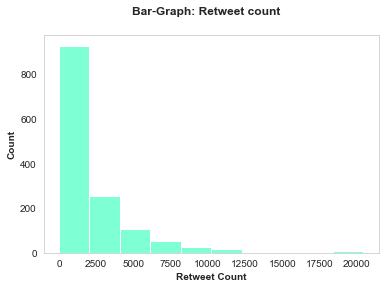

In [195]:
# Bar Chart 
df_final_master[df_final_master.retweet_count <= 21000].retweet_count.hist(grid=False,color = 'aquamarine');
plt.xlabel('Retweet Count',weight='bold')
plt.ylabel('Count',weight='bold');
plt.suptitle('Bar-Graph: Retweet count', fontsize=12,weight='bold')

Text(0.5,0.98,'Bar-Graph: Favorite count')

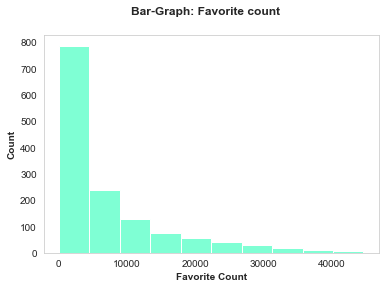

In [196]:
# Bar Chart 
df_final_master[df_final_master.favorite_count <= 45000].favorite_count.hist(grid=False,color = 'aquamarine',);
plt.xlabel('Favorite Count',weight='bold')
plt.ylabel('Count',weight='bold');
plt.suptitle('Bar-Graph: Favorite count', fontsize=12,weight='bold')

##### Most Popular Names

In [197]:
df_final_master.name.value_counts().head(6)

None       779
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Tucker       9
Name: name, dtype: int64

##### Top dog names are Oliver,Tucker,Winston,and Penny

##### What is the most common dog rating?

In [198]:
df_final_master.rating.value_counts().head(6)

12.0    500
10.0    436
11.0    426
13.0    311
9.0     155
8.0     102
Name: rating, dtype: int64

##### Most common Dog Rating is 12 with 500 instances

#####  Dogs with the lowest dog rating



In [199]:
df_final_master[df_final_master['rating']==1]

,tweet_id,name,text,timestamp,dog_type,rating,full_text,favorite_count,retweet_count,display_text_range,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1267,696490539101908992,None,After reading the comments I may have overesti...,2016-02-08 00:27:39,NaN,1.0,After reading the comments I may have overesti...,1296.0,161.0,"[0, 101]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1690,675153376133427200,None,What kind of person sends in a picture without...,2015-12-11 03:21:23,NaN,1.0,What kind of person sends in a picture without...,6552.0,2770.0,"[0, 121]",...,1.0,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False
1761,673716320723169284,None,The millennials have spoken and we've decided ...,2015-12-07 04:11:02,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1859,671550332464455680,None,After 22 minutes of careful deliberation this ...,2015-12-01 04:44:10,NaN,1.0,After 22 minutes of careful deliberation this ...,940.0,216.0,"[0, 135]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,670783437142401025,None,Flamboyant pup here. Probably poisonous. Won't...,2015-11-29 01:56:48,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,Lacewing,0.381955,False,Sulphur Butterfly,0.106810,False,Leafhopper,0.068347,False
2080,667549055577362432,None,Never seen dog like this. Breathes heavy. Tilt...,2015-11-20 03:44:31,NaN,1.0,Never seen dog like this. Breathes heavy. Tilt...,5915.0,2361.0,"[0, 140]",...,1.0,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
2157,666104133288665088,None,Not familiar with this breed. No tail (weird)....,2015-11-16 04:02:55,NaN,1.0,Not familiar with this breed. No tail (weird)....,14269.0,6560.0,"[0, 134]",...,1.0,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False


###### Scatter Plot 

C:\Users\dmedhi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dmedhi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


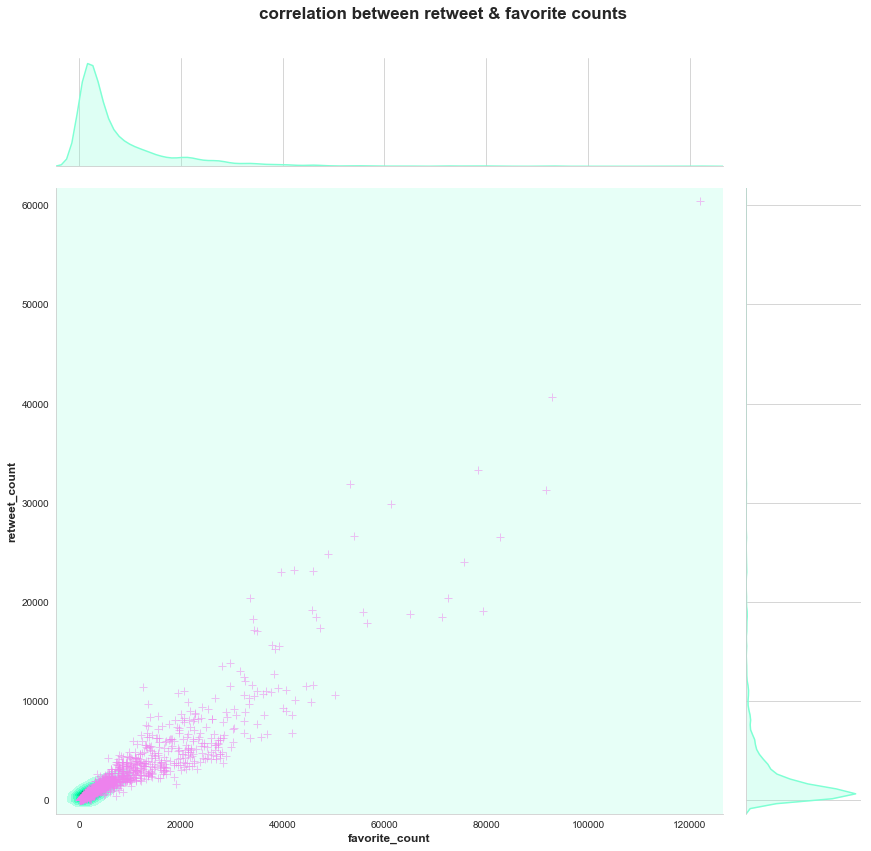

In [200]:
#Visualization comparing the favorite & retweet counts using scatter plot

sns.set_style('whitegrid')
plot_rt_ft = sns.jointplot(x="favorite_count", 
                  y="retweet_count", 
                  data=df_final_master, 
                  color="aquamarine",
                  kind="kde", 
                  size=12)
plot_rt_ft.plot_joint(plt.scatter,  
             c="violet",
             s=80, 
             linewidth=1, 
             marker="+",
             alpha=0.5)
plot_rt_ft.set_axis_labels("favorite_count", "retweet_count",fontsize=12,weight='bold')

plot_rt_ft.fig.subplots_adjust(top=0.92)

plot_rt_ft.fig.suptitle('correlation between retweet & favorite counts', fontsize=17,weight='bold',);

##### Retweets Over Time

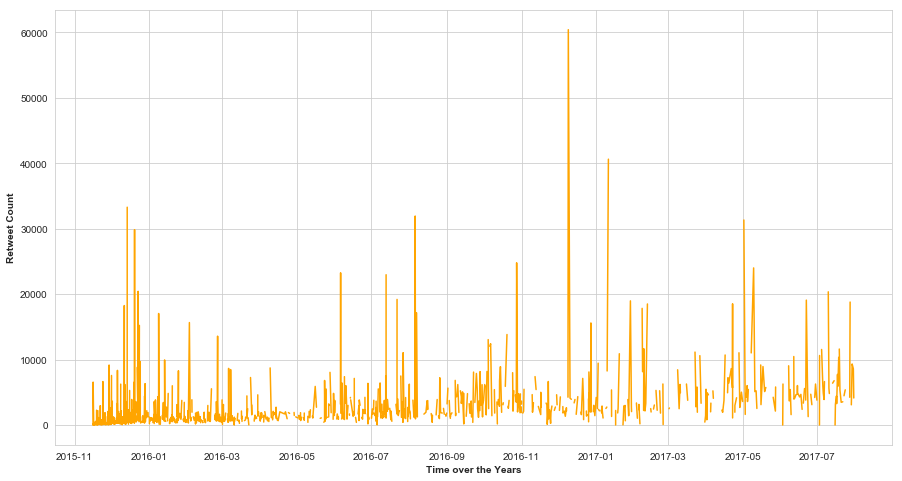

In [201]:
#Line graph
plt.subplots(figsize=(15, 8))
plt.plot(df_final_master.timestamp,df_final_master.retweet_count,color= 'orange');
plt.xlabel('Time over the Years',weight='bold')
plt.ylabel('Retweet Count',weight='bold');

##### Favorite Tweets Over Time

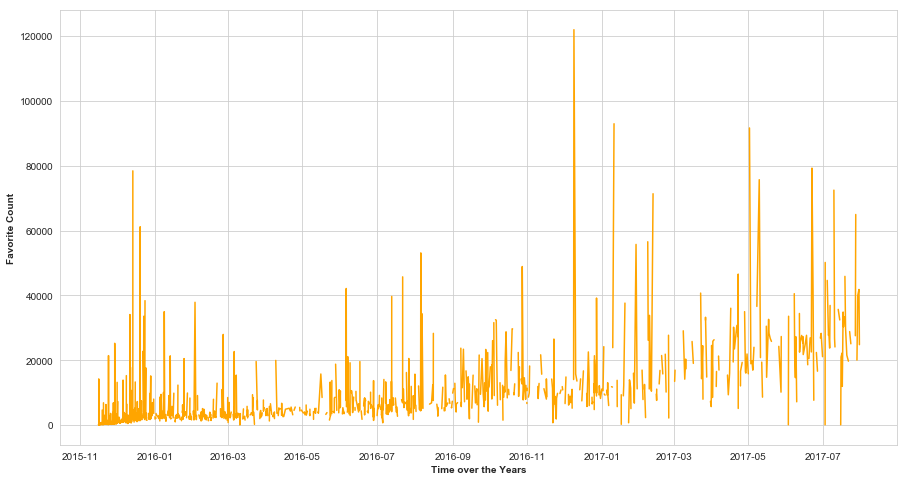

In [202]:
#line graph
plt.subplots(figsize=(15, 8))
plt.plot(df_final_master.timestamp, df_final_master.favorite_count,color= 'orange');
plt.xlabel('Time over the Years',weight='bold')
plt.ylabel('Favorite Count',weight='bold');

#### We can notice the gradual increase of both favorites and retweets over time.

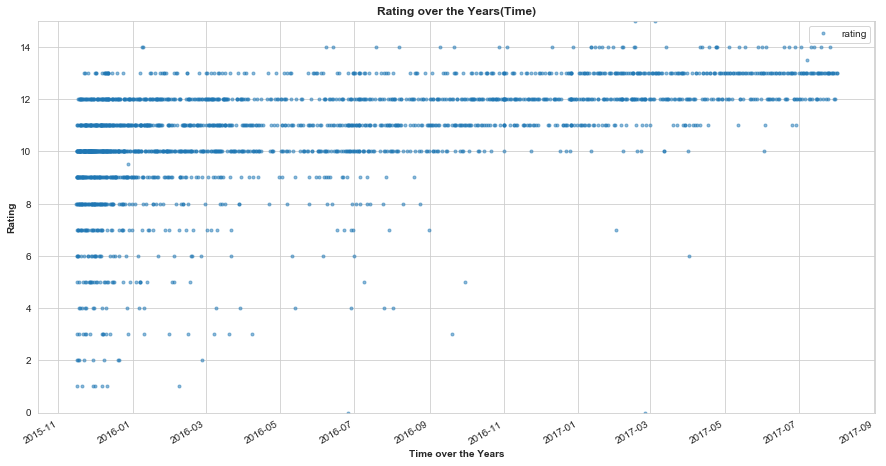

In [203]:
# Scatter plot 
df_final_master.plot(x='timestamp',y ='rating', ylim=[0,15], style = '.', alpha = 0.5, figsize=(15, 8))
plt.title('Rating over the Years(Time)',weight='bold')
plt.xlabel('Time over the Years',weight='bold')
plt.ylabel('Rating',weight='bold');

#### Visualization: Dog_Type

In [204]:
# count of dog_types
df_final_master['dog_type'].value_counts()

pupper     250
doggo       78
puppo       32
floofer      4
Name: dog_type, dtype: int64

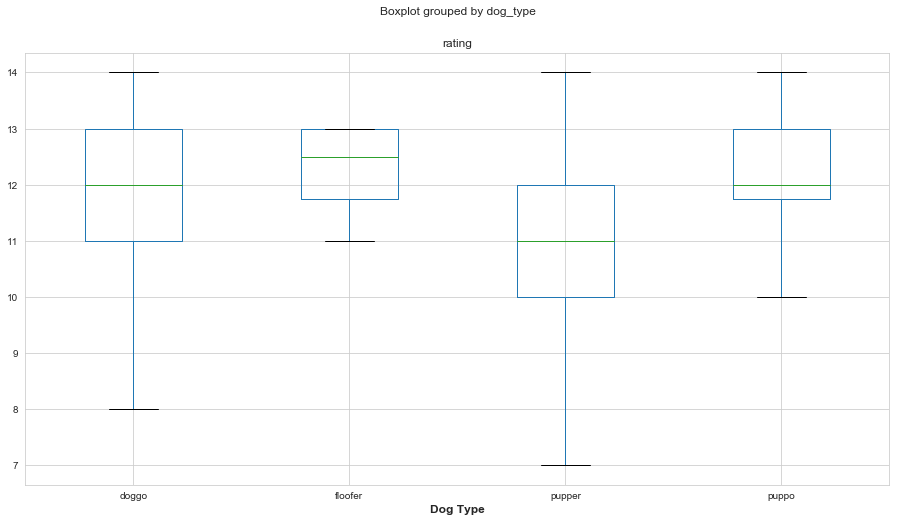

In [205]:
# Box plot for dog_types without the outliers

df_final_master.boxplot(column='rating', by='dog_type',sym='',figsize=(15, 8));
#plt.title('Rating over the Years(Time)',weight='bold')
plt.xlabel('Dog Type',weight='bold',fontsize=12);


##### The mean for doggo and puppo dog types are similar

In [206]:
#Group by statistics for dog_types

df_final_master.groupby('dog_type')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,78.0,11.641026,1.713009,4.0,11.00,12.0,13.0,14.0
floofer,4.0,12.250000,0.957427,11.0,11.75,12.5,13.0,13.0
pupper,250.0,12.000000,9.571125,3.0,10.00,11.0,12.0,99.0
puppo,32.0,12.062500,1.216486,9.0,11.75,12.0,13.0,14.0


##### This dataset has very few rows for floofer.

##### The mean for all 4 is very simillar ~ 12

##### Puppers have lower rates than the other dog types. This could also be due to many number of outliers

##### Floofers are consistently rated above 10. 


##### Dog Type grouped by tweet_id

In [207]:
#Group by statistics for dog_types
dog_counts = df_final_master.groupby('dog_type')['tweet_id'].count()
dog_counts

dog_type
doggo       78
floofer      4
pupper     250
puppo       32
Name: tweet_id, dtype: int64

##### Pie chart showing dog_type distribution 

In [208]:
denominator = dog_counts.sum()
denominator

364

In [209]:
labels = []
denominator = dog_counts.sum()

for index, count in enumerate(dog_counts):
    label_first_part = dog_counts.index.values[index]
    label_second_part = (count / denominator) * 100
    label_second_part = round(label_second_part, 2)
    label_second_part = str(label_second_part) + '%'
    label = label_first_part + ' ' + label_second_part
    labels.append(label)

In [210]:
# Percentage of each labels
labels

['doggo 21.43%', 'floofer 1.1%', 'pupper 68.68%', 'puppo 8.79%']

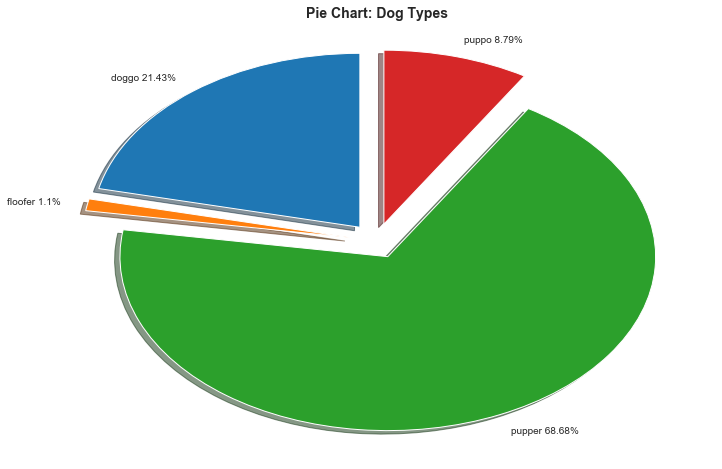

In [211]:
# Plot a pie chart

#Reference: https://stackoverflow.com/questions/46864696/how-to-resolve-python-error-while-generating-pie-chart-valueerror-explode-m

plt.figure(figsize=(12, 8))
plt.pie(dog_counts, labels = labels, explode = (0.1, 0.1, 0.1,.1), 
        shadow = True, startangle = 90)
plt.title('Pie Chart: Dog Types',weight='bold',fontsize=14);

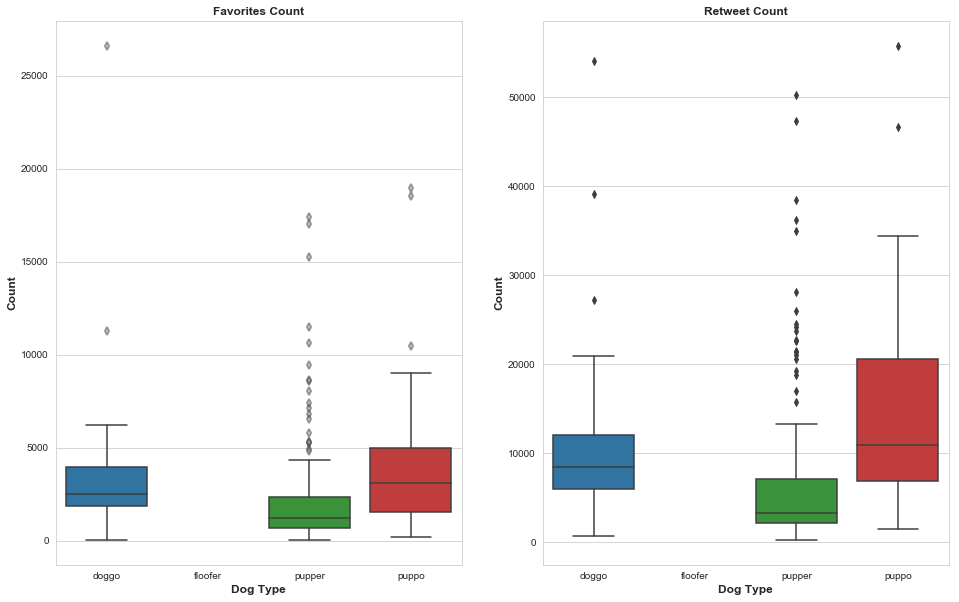

In [212]:
# BoxPlot Favorite Count/Retweet count with Dog Types with outliers

#Reference: https://stackoverflow.com/questions/35131798/tweaking-seaborn-boxplot
#           https://matplotlib.org/1.3.1/examples/pylab_examples/line_styles.html

outliers = dict(markerfacecolor='1.75',markeredgewidth=2, markersize=5,alpha=0.5)

plt.subplots(figsize=(16, 10))
plt.subplot(121)
sns.boxplot(x=df_final_master.dog_type, y=df_final_master.retweet_count,flierprops=outliers,  linewidth=1.5)
plt.title('Favorites Count', fontsize=12, weight='bold')
plt.xlabel('Dog Type', weight='bold',fontsize=12)
plt.ylabel('Count', weight='bold',fontsize=12);

plt.subplot(122)
sns.boxplot(x=df_final_master.dog_type, y=df_final_master.favorite_count,  linewidth=1.5)
plt.title('Retweet Count', fontsize=12, weight='bold')
plt.xlabel('Dog Type', weight='bold',fontsize=12)
plt.ylabel('Count',weight='bold',fontsize=12);

##### The floofer box chart is too small compared with the other dog types and its outliers

#### Limitation

This dataset used is not absolute. It does not contain all possible data in the world. The scope of this dataset is limited and as such the results are limited as well.

The quality/integrity of the data is not completely verified. However, as @dog_rates said to Brant, "they're good dogs Brent,". This is Twitter data. Being a social media platform, it can be useful in a social context. However, from a data integrity perspective, we would need to verify extensively before we use the data. Also, we would need more data for detailed investigation and analysis.

All data in the dataset is considered to be valid. I have not verified the methods used to collect this data. My assumption is that the curated dataset is collected by fair means and not involved in any dispute.

